In [1]:
from PIL import Image

img = Image.open("bild1.jpg")
img = img.resize((round(img.size[0] / 10), round(img.size[1] / 10)), resample=Image.BICUBIC)

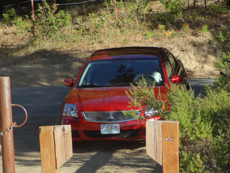

In [2]:
img

In [3]:
import keras.models as models

filename = "cardetector.keras"

model = models.load_model(filename)

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageDraw

size = 100
step_size = 10

cars = [] 

for x in range(0, img.size[0] - size, step_size):
    for y in range(0, img.size[1] - size, step_size):
        part = img.crop((x, y, x + size, y + size))
        data = np.asarray(part.resize((32, 32), resample=Image.BICUBIC))
        data = data.astype(np.float32) / 255.
        
        pred = model.predict(data.reshape(-1, 32, 32, 3))
        if pred[0][0] > 0.98:
            print(pred[0][0])
            cars.append((x, y))

out = img.copy()
draw = ImageDraw.Draw(out)

cars_drawn = []

for car in cars:
    exists = False
    for car_drawn in cars_drawn:
        if car[0] >= car_drawn[0] and car[0] <= car_drawn[0] + size:
            if car[1] >= car_drawn[1] and car[1] <= car_drawn[1] + size:
                exists = True
                
    if exists == False:
        points = [
            car,
            (car[0], car[1] + size),
            (car[0] + size, car[1] + size),
            (car[0] + size, car[1]),
            car
        ]
        draw.line(points, "yellow", 5)
        cars_drawn.append(car)
        print(car)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

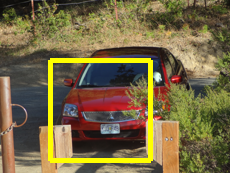

In [5]:
out